## Sales Analysis

### Importing Libraries

In [191]:
from os import listdir
from os.path import isfile, join

import pandas as pd

### Importing Data

In [192]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data/')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index = False)

### Data Preprocessing

In [193]:
all_data = pd.read_csv('all_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [226]:
# Looking for any NA values
all_data.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date            0
Purchase Address      0
Month                 0
Sales                 0
City                894
Hour                  0
Minute                0
dtype: int64

In [228]:
# Dropping NA values
all_data.dropna(inplace = True)

In [196]:
# Creating Month values
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [197]:
# Adding Month Column and changing types of columns
all_data['Month'] = all_data["Order Date"].str[0:2]

all_data['Month'] = all_data['Month'].astype('int32')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [199]:
# Adding Sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [200]:
# Changing type of Sales column
all_data['Sales'] = all_data['Sales'].astype('int')

In [201]:
SalesbyMonth = pd.DataFrame(all_data['Sales'].groupby(all_data['Month']).sum())
SalesbyMonth

all_data.groupby("Month").sum()

# December > all

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1815143
2,13449,2188884.72,2193165
3,17005,2791207.83,2795907
4,20558,3367671.02,3377215
5,18667,3135125.13,3140375
6,15253,2562025.61,2567871
7,16072,2632539.56,2637209
8,13448,2230345.42,2235667
9,13109,2084992.09,2088915


### Sales by Month

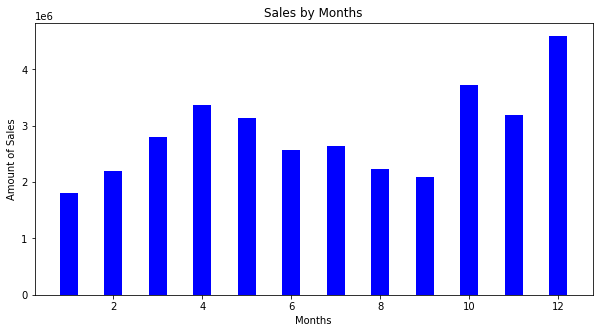

In [202]:
import numpy as np
import matplotlib.pyplot as plt

results = all_data.groupby('Month').sum()

# creating the dataset
months = range(1,13)
sales = results['Sales']

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(months, sales, color ='blue',
		width = 0.4)

plt.xlabel('Months')
plt.ylabel("Amount of Sales")
plt.title("Sales by Months")
plt.show()


### Sales by City

In [203]:
city = pd.DataFrame(all_data['Purchase Address'].str.split(',').tolist())
city.head()

all_data['City'] = city[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99,Los Angeles
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11,San Francisco


In [204]:
salesbycity = all_data.groupby('City').sum().reset_index()
salesbycity

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta,16537,2690417.19,104186,2693976
1,Austin,11008,1817797.26,69418,1820695
2,Boston,22251,3624834.89,140103,3633695
3,Dallas,16616,2671374.82,104091,2677893
4,Los Angeles,33256,5515767.76,207115,5528071
5,New York City,27847,4541563.25,174860,4550480
6,Portland,13929,2301343.02,87172,2306396
7,San Francisco,50138,8282472.55,313398,8297942
8,Seattle,16471,2683211.98,104257,2685030


C:\Users\user\AppData\Local\Temp\ipykernel_7520\1733488124.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


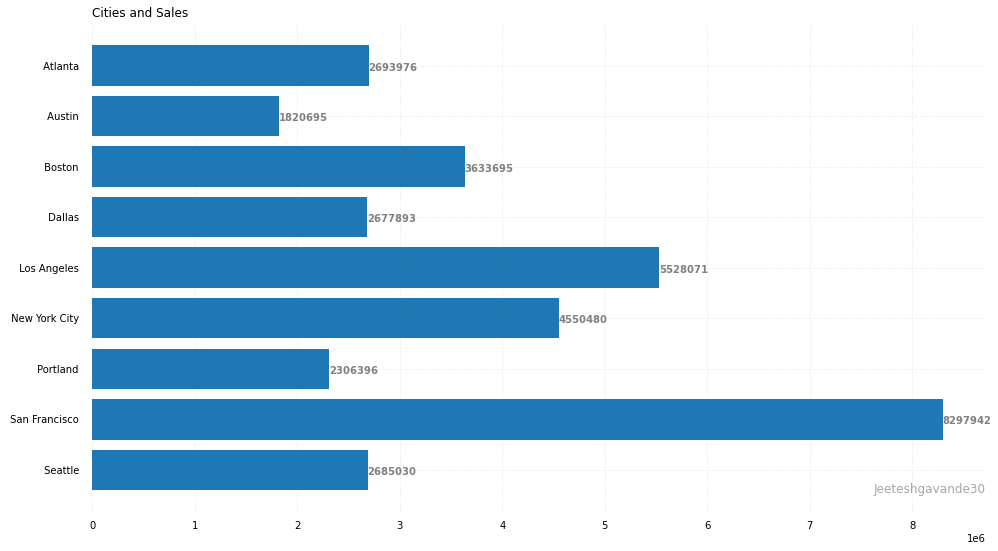

In [205]:
import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas
cities = salesbycity['City']
sales = salesbycity['Sales']

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(cities, sales)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Cities and Sales',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()


### Sales by Hour

In [206]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [207]:
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data["Order Date"].dt.minute

In [208]:
salesbyhour = all_data.groupby('Hour').sum().reset_index()


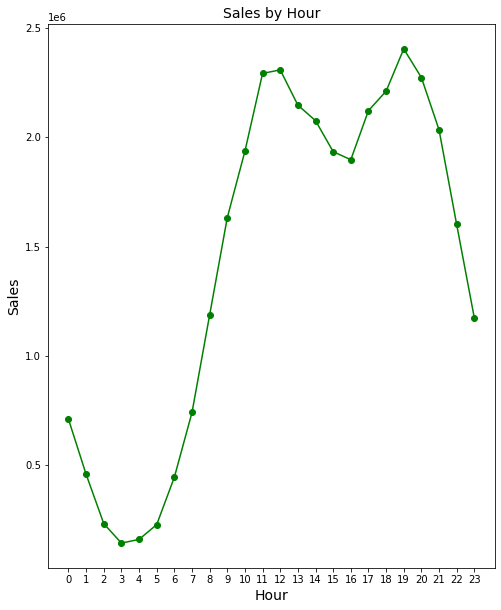

In [209]:
plt.plot(salesbyhour['Hour'].unique(), salesbyhour['Sales'], color='green', marker='o')
plt.title('Sales by Hour', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(salesbyhour['Hour'].unique())
plt.grid(False)
plt.show()

plt.rcParams['figure.figsize'] = [8, 10]

### Sales by Group

In [211]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))  

C:\Users\user\AppData\Local\Temp\ipykernel_7520\681196240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [212]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [213]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [225]:
product_group = all_data.groupby('Product').sum().reset_index()
product_group.sort_values(by = 'Quantity Ordered')


,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
10,LG Dryer,646,387600.00,4383,387600,9326,19043
11,LG Washing Machine,666,399600.00,4523,399600,9785,19462
16,Vareebadd Phone,2068,826000.00,14309,827200,29472,61835
0,20in Monitor,4129,451068.99,29336,450089,58764,122252
14,ThinkPad Laptop,4130,4127958.72,28950,4125872,59746,121508
13,Macbook Pro Laptop,4728,8030800.00,33548,8037600,68261,137574
8,Flatscreen TV,4819,1440000.00,34224,1445700,68815,142789
9,Google Phone,5532,3315000.00,38305,3319200,79479,162773
3,34in Ultrawide Monitor,6199,2348718.19,43304,2349439,89076,183480
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2428930,90916,184331
